In [1]:
%matplotlib inline

In [2]:
import numpy as np
import skimage.io
import pickle
import matplotlib.pyplot as plt
import os

# Functions

In [3]:
def get_feature_map(batches):
    feature_map = np.zeros((128,128,64))
    for i in range(16):
        for j in range(16):
            pos = j + i*16
            x = i*8
            y = j*8
            feature_map[x:x+8, y:y+8] = batches[pos,...]
    return feature_map

# Read data generated by ISL

In [4]:
feature_pack = pickle.load(open("/tmp/isl/eval_eval_infer/00984658/featpack.pkl","rb"))

In [5]:
image_crop = np.zeros((feature_pack[-1][0]+128, feature_pack[-1][1]+128))
features = np.zeros((feature_pack[-1][0]+128, feature_pack[-1][1]+128, 64))
for k in feature_pack:
    image_crop[k[0]:k[0]+128, k[1]:k[1]+128] = k[3][0,:,:,0,0,0]
    features[k[0]:k[0]+128, k[1]:k[1]+128, :] = get_feature_map(k[2])

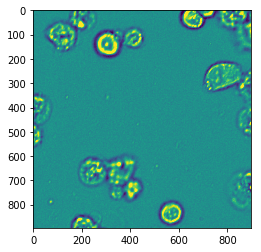

In [6]:
plt.imshow(image_crop)

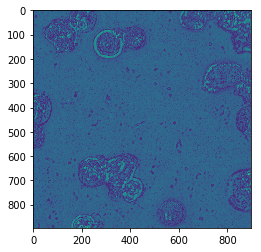

In [7]:
plt.imshow(features[:,:,18])

# Read original image and segmentation masks

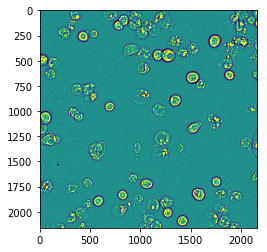

In [8]:
data_dir = "/home/ubuntu/bucket/evaluation_data/000012070903_2019-01-10T20_04_27-Measurement_3/validation_quantile_99_overfit/"
for file_name in os.listdir(data_dir):
    image = skimage.io.imread(data_dir + file_name)
    plt.figure()
    plt.imshow(image)
    break

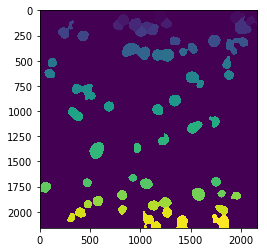

In [9]:
data_dir = "/home/ubuntu/bucket/flatfield/000012070903_2019-01-10T20_04_27-Measurement_3/000012070903_2019-01-10T20_04_27-Measurement_3-sk1-A01-f02-ch1/"
file_name = "segmentation_000012070903_2019-01-10T20_04_27-Measurement_3_sk1_A01_f02_ch1.tiff"
segmentation = skimage.io.imread(data_dir + file_name)
plt.imshow(segmentation)

# Align crop in original image

In [10]:
x,y = image_crop.shape
margin = 125

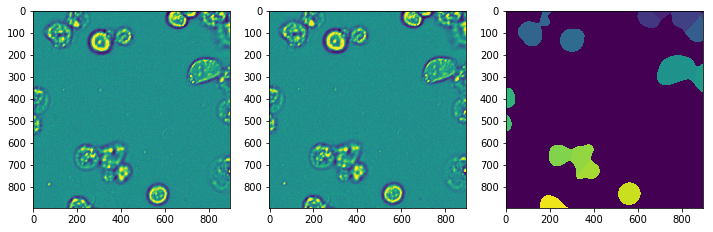

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(131)
plt.imshow(image_crop)
plt.subplot(132)
plt.imshow(image[margin:x+margin, margin:y+margin])
plt.subplot(133)
plt.imshow(segmentation[margin:x+margin, margin:y+margin])

# Extract single-cell features

In [12]:
segmentation_crop = segmentation[margin:x+margin, margin:y+margin]
single_cells = {k:0 for k in np.unique(segmentation_crop) if k > 0}
single_cells.keys()

dict_keys([4228, 6342, 7399, 8456, 11627, 12684, 13741, 20083, 21140, 25368, 27482, 31710, 32768, 33825, 35939, 38053, 39110])

In [13]:
for object_key in single_cells.keys():
    if object_key > 0:
        mask = np.reshape(segmentation_crop == object_key, list(segmentation_crop.shape) + [1])
        area = np.sum(mask > 0)
        single_cells[object_key] = {"feature_map":features*mask, "area":area}

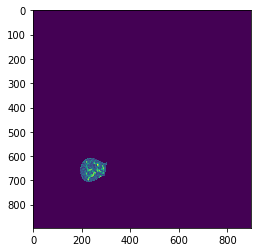

In [14]:
plt.imshow(single_cells[31710]["feature_map"][:,:,0])

In [43]:
single_cell_features = []
for object_key in single_cells.keys():
    z = single_cells[object_key]["feature_map"][:,:,:]
    feature_vector = np.sum(np.sum(z, axis=0), axis=0)
    feature_vector = feature_vector / single_cells[object_key]["area"]
    single_cell_features.append( feature_vector[np.newaxis,:] )
    
single_cell_feature_matrix = np.concatenate(single_cell_features)

# Visualize features

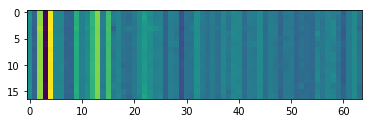

In [45]:
plt.imshow(single_cell_feature_matrix)